<a href="https://colab.research.google.com/github/joaopedrodelcolli/calcula_idade/blob/main/MiniProjeto_E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/content/drive/MyDrive/MiniProjeto-E-Commerce

In [ ]:
# 1. DEFINIÇÃO DO CAMINHO DOS DADOS

# Caminho onde os arquivos CSV estão armazenados no Google Drive
caminho = "/content/drive/MyDrive/MiniProjeto-E-Commerce"

In [ ]:
# 2. CONEXÃO COM O GOOGLE DRIVE

from google.colab import drive

# Monta o Google Drive no ambiente do Colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 3. IMPORTAÇÃO DAS BIBLIOTECAS

# Manipulação de dados
import pandas as pd

# Operações numéricas
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt

# Visualização estatística
import seaborn as sns

# Manipulação de datas
from datetime import datetime, timedelta

# Exibe gráficos diretamente no notebook
%matplotlib inline

orders
items
payments

pedidos
itens
pagamentos

In [ ]:
# 4. CARREGAMENTO DOS DADOS

# Leitura dos datasets principais
orders = pd.read_csv(f'{caminho}/olist_orders_dataset.csv')
items = pd.read_csv(f'{caminho}/olist_order_items_dataset.csv')
payments = pd.read_csv(f'{caminho}/olist_order_payments_dataset.csv')

In [ ]:
# Visualização inicial dos dados

orders.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
# 5. ANÁLISE EXPLORATÓRIA INICIAL

# Verifica distribuição dos status dos pedidos
orders['order_status'].value_counts()

,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [ ]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
# Informações estruturais dos datasets
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
# 6. TRATAMENTO DE DADOS

# Lista de colunas que devem ser convertidas para datetime
date_columns = [
'order_purchase_timestamp',
'order_approved_at',
'order_delivered_carrier_date',
'order_delivered_customer_date',
'order_estimated_delivery_date'
]

# Conversão das colunas para o tipo datetime
for col in date_columns:
  orders[col] = pd.to_datetime(orders[col])

In [ ]:
# 7. VALIDAÇÃO DE CHAVES

# Verifica quantidade de pedidos únicos em cada dataset
orders['order_id'].nunique()

99441

In [ ]:
items['order_id'].nunique()

98666

In [ ]:
payments['order_id'].nunique()

99440

In [ ]:
# 8. INTEGRAÇÃO DOS DADOS

# Merge dos datasets utilizando order_id como chave
df = (
  orders
  .merge(items, on='order_id', how='left')
  .merge(payments, on='order_id', how='left')
)

In [ ]:
# 9. MÉTRICAS DE NEGÓCIO

# Faturamento total
faturamento_total = df['price'].sum()
faturamento_total

np.float64(14209250.310000002)

In [ ]:
# Ticket médio por pedido
ticket_medio = df.groupby('order_id')['price'].sum().mean()
ticket_medio

np.float64(142.8912652728754)

In [ ]:
# Quantidade total de pedidos
qtd_pedidos = orders['order_id'].nunique()
qtd_pedidos

99441

In [ ]:
# 10. ANÁLISE TEMPORAL

# Criação da coluna com período mensal
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')

In [ ]:
# Cálculo do faturamento mensal
faturamento_mensal = (
df.groupby('order_month')['price']
.sum()
.reset_index()
.sort_values('order_month')
)

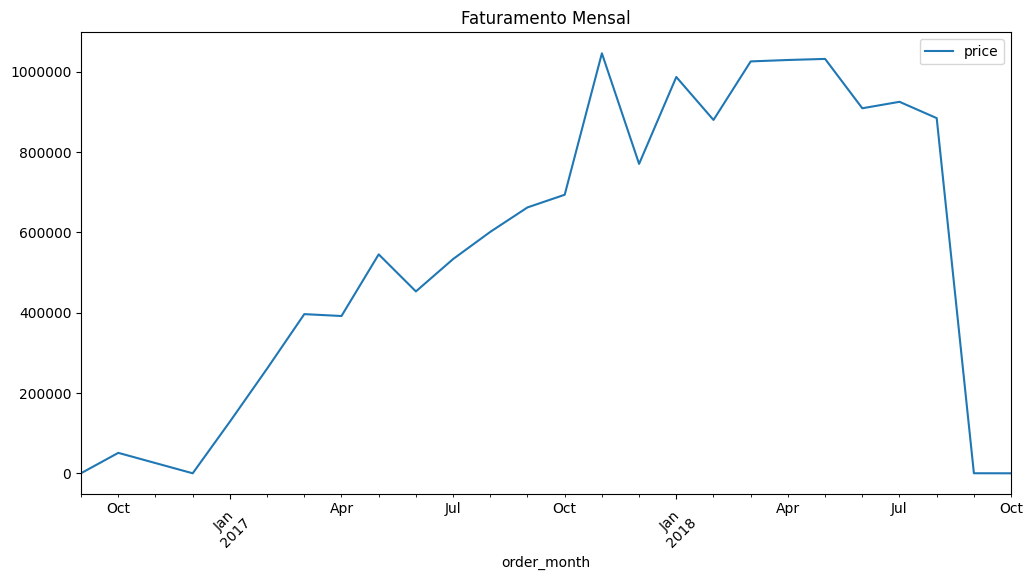

In [ ]:
# 11. VISUALIZAÇÃO - FATURAMENTO MENSAL
faturamento_mensal.sort_values('order_month').plot(
    x='order_month',
    y='price',
    kind='line',
    figsize=(12, 6),
    title='Faturamento Mensal'
)

plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Exibe as primeiras linhas do dataframe agregado
display(faturamento_mensal.head())

,order_month,price
0,2016-09,267.36
1,2016-10,50942.23
2,2016-12,10.90
3,2017-01,128637.99
4,2017-02,260753.86


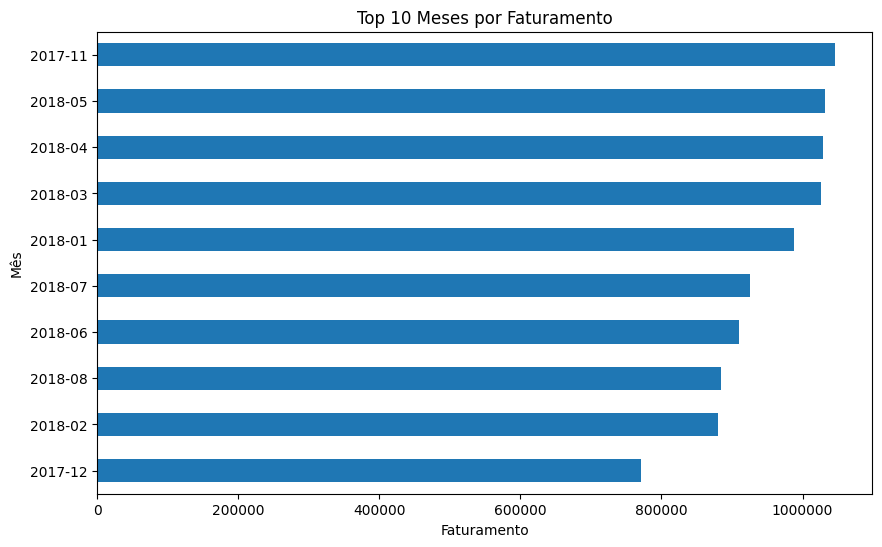

In [ ]:
# 12. TOP 10 MESES POR FATURAMENTO
top_meses = faturamento_mensal.sort_values(by='price', ascending=False).head(10)

top_meses.plot(
    kind='barh',
    x='order_month',
    y='price',
    figsize=(10, 6),
    legend=False
)

plt.ticklabel_format(style='plain', axis='x')

plt.title('Top 10 Meses por Faturamento')
plt.xlabel('Faturamento')
plt.ylabel('Mês')

plt.gca().invert_yaxis()

plt.show()

payment_installments

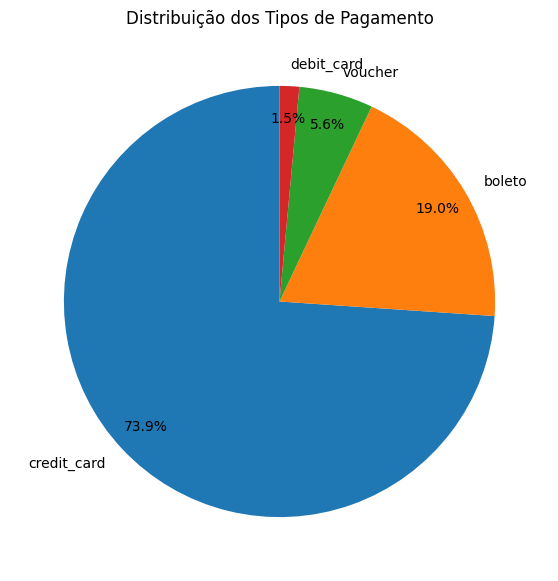

In [ ]:
# 13. DISTRIBUIÇÃO DOS TIPOS DE PAGAMENTO

# Remove categoria 'not_defined' caso exista
pagamentos = payments['payment_type'].value_counts().drop('not_defined', errors='ignore')

plt.figure(figsize=(7, 7))


pagamentos.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85
)

plt.title('Distribuição dos Tipos de Pagamento')
plt.ylabel('')
plt.show()
